In [1]:
# 1. T_test

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/cats.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [3]:
s_m = df.loc[df['Sex'] == 'M', 'Bwt']
s_f = df.loc[df['Sex'] == 'F', 'Bwt']
s_m

47     2.0
48     2.0
49     2.1
50     2.2
51     2.2
      ... 
139    3.7
140    3.8
141    3.8
142    3.9
143    3.9
Name: Bwt, Length: 97, dtype: float64

In [4]:
s_m_i = pd.value_counts(s_m.values, sort = False)
s_f_i = pd.value_counts(s_f.values, sort = False)
s_m_i

2.0    2
2.1    1
2.2    8
2.3    1
2.4    5
2.5    8
2.6    6
2.7    9
2.8    7
2.9    5
3.0    9
3.1    6
3.2    6
3.3    5
3.4    5
3.5    5
3.6    4
3.7    1
3.8    2
3.9    2
dtype: int64

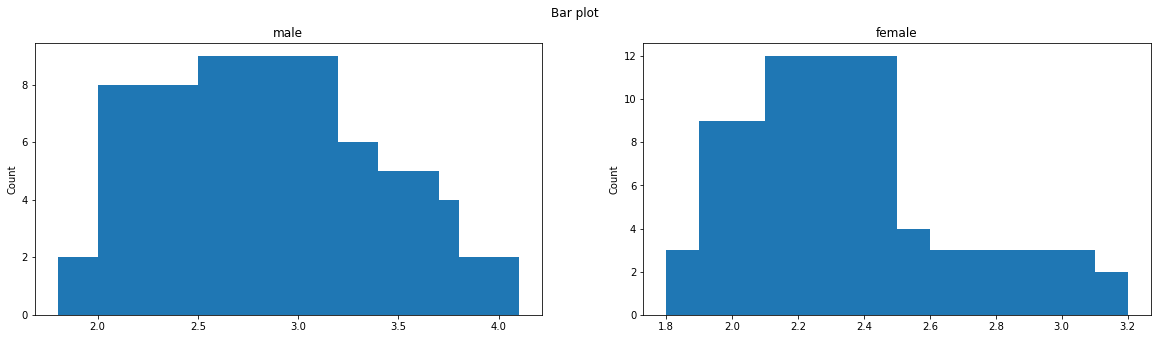

20
20
Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
  

In [5]:
fig, axs = plt.subplots(1,2, figsize = (20,5))
fig.suptitle('Bar plot')
width = 0.4

axs[0].bar(s_m_i.index, s_m_i.values, width)
axs[0].set_title('male')
axs[0].set_ylabel('Count')

axs[1].bar(s_f_i.index, s_f_i.values, width)
axs[1].set_title('female')
axs[1].set_ylabel('Count')
plt.show()
print(len(s_m_i.index)) # X
print(len(s_m_i.values)) # Y
help(plt.bar)

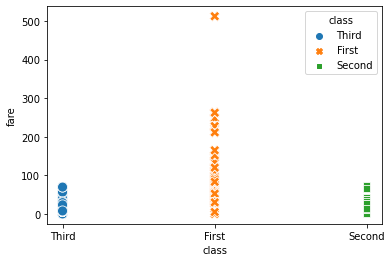

In [9]:
# 2. 분산분석
df = pd.read_csv('data/titanic.csv')
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = 'class',
                y = 'fare',
                hue = 'class',
                style = 'class',
                s = 100,
                data = df)
plt.show()

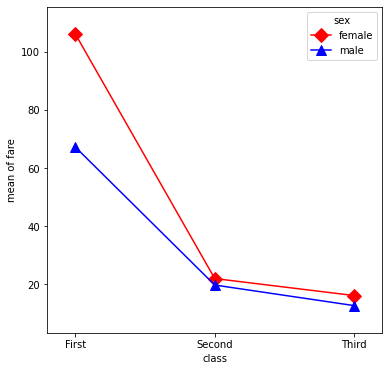

In [11]:
# 상호작용그래프
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize = (6,6))
fig = interaction_plot(df['class'], df['sex'], df['fare'], colors = ['red', 'blue'], markers = ['D', '^'], ms = 10, ax = ax)

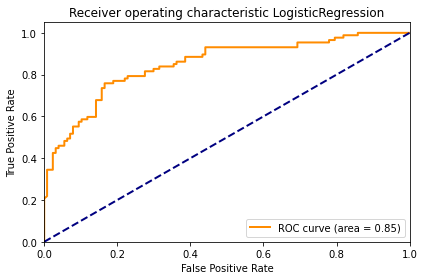

In [176]:
# 3. 로지스틱 회귀분석 
# ROC 커브 시각화
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


def draw_roc(y_test, y_predict_proba, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_predict_proba) # y_predict_proba 주의(확률)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color = 'darkorange',
            lw = lw, label = "ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic {}".format(model_name))
    plt.legend(loc='lower right')
    plt.ion()
    plt.tight_layout()
    plt.show()
draw_roc(y_test, y_predict_proba, "LogisticRegression")

In [ ]:
# 4. 회귀분석

In [52]:
# 5. 군집분석 (K-means 군집분석)
# SSE (엘보우기법)
import matplotlib.pyplot as plt

def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters = i, random_state = 1)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The number of clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)

C:\Users\KDB\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


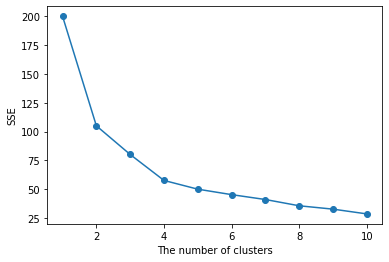

[200.0, 104.96163315756871, 80.08569526137276, 57.55425863091104, 49.96920284452793, 45.236049045772866, 40.99965950480165, 35.570970075454255, 32.65195608327404, 28.518626026978588]


In [45]:
elbow(X)

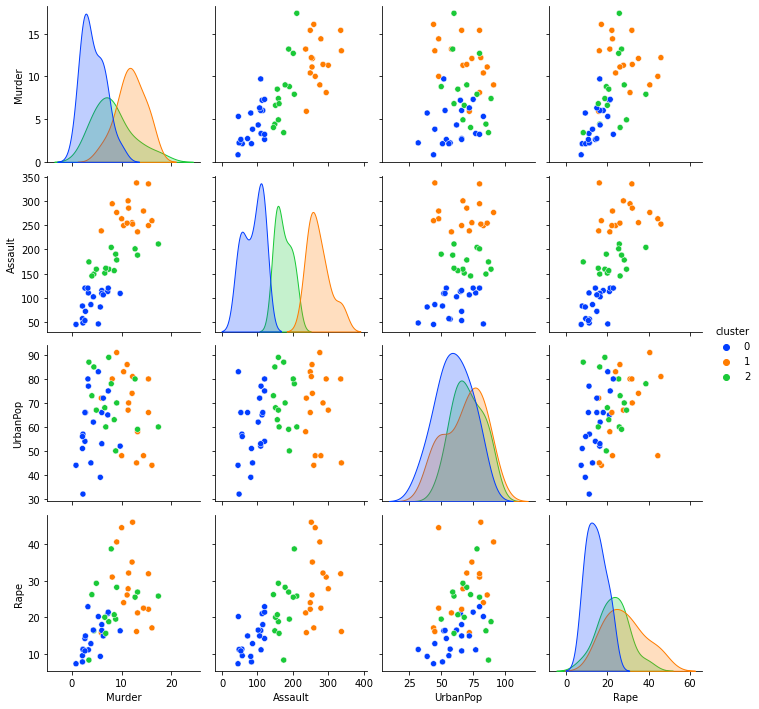

In [57]:
# pairplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(X,
             diag_kind = 'kde',
             hue = 'cluster',
             palette = 'bright')
plt.show()

###### pairplot
###### 데이터프레임의 열(변수)을 두 개씩 짝 지을 수 있는 모든 조합에 대해서 표현
###### ex)) 1행(Murder), 2열(Assault) : 강도 발생률이 높을 수록, 살인률이 높다.